In [1]:
using Plots, LaTeXStrings, DifferentialEquations, LinearAlgebra

# **Problema del "DIMERO" en la Ecuación no lineal de Schrödinger**

## Análisis lineal y solución analítica

\begin{equation}
i\frac{d\phi_1}{dz} + V\phi_2 + \gamma|\phi_1|^2\phi_1 = 0, \hspace{1cm} i\frac{d\phi_2}{dz} + V\phi_1 + \gamma|\phi_2|^2\phi_2 = 0.
\end{equation}

Si asumimos que el parámetro no lineal es cero ($\gamma = 0$), derivando la primera ecuación y sustituyendo el segundo término de esta por su equivalencia de la segunda ecuación obtenemos:

\begin{equation}
i\frac{d^2\phi_1}{dz^2} + V\frac{d\phi_2}{dz}  = 0, \rightarrow i\frac{d^2\phi_1}{dz^2} + i V\left( V\phi_1 \right)  = 0.
\end{equation}

Arrojandonos una ecuación diferencial lineal de segundo orden, tipo oscilador armónico

\begin{equation}
\frac{d^2\phi_1}{dz^2} +  V^2 \left(\phi_1 \right)  = 0, \hspace{1cm} \leftrightarrow \hspace{1cm} \frac{d^2 x}{dt^2} +  \omega^2 x  = 0,
\end{equation}

cuyas soluciones pueden escribirse como:

\begin{equation}
\phi_1(z) = \cos{(V z)}, \hspace{1cm} \phi_2(z) = i\cos{(V z - \pi/2)}.
\end{equation}

## Formulación matricial del problema

Necesitamos escribir nuestro sistema de ecuaciones en forma matricial, es decir, $\frac{d}{dz}\vec{\phi} = \hat{M}\vec{\phi}$, entonces:
\begin{equation}
i\frac{d}{dz}\begin{bmatrix} \phi_1 \\ \phi_2 \end{bmatrix} + \hat{V} \begin{bmatrix} \phi_1 \\ \phi_2 \end{bmatrix} + 
\gamma \begin{bmatrix} |\phi_1|^2 & 0 \\ 0 & |\phi_2|^2 \end{bmatrix} \begin{bmatrix} \phi_1 \\ \phi_2 \end{bmatrix} = 0
\end{equation}

\begin{equation}
i\frac{d}{dz}\begin{bmatrix} \phi_1 \\ \phi_2 \end{bmatrix} + \begin{bmatrix} 0 & V \\ V & 0 \end{bmatrix} \begin{bmatrix} \phi_1 \\ \phi_2 \end{bmatrix} + 
\gamma \begin{bmatrix} |\phi_1|^2 & 0 \\ 0 & |\phi_2|^2 \end{bmatrix} \begin{bmatrix} \phi_1 \\ \phi_2 \end{bmatrix} = 0
\end{equation}

\begin{equation}
\frac{d}{dz}\begin{bmatrix} \phi_1 \\ \phi_2 \end{bmatrix} = i\begin{bmatrix} 0 & V \\ V & 0 \end{bmatrix} \begin{bmatrix} \phi_1 \\ \phi_2 \end{bmatrix} + 
i \gamma \begin{bmatrix} |\phi_1|^2 & 0 \\ 0 & |\phi_2|^2 \end{bmatrix} \begin{bmatrix} \phi_1 \\ \phi_2 \end{bmatrix}
\end{equation}

\begin{equation}
\frac{d}{dz}\begin{bmatrix} \phi_1 \\ \phi_2 \end{bmatrix} = 
i\begin{bmatrix} \gamma|\phi_1|^2 & V \\ V & \gamma|\phi_2|^2 \end{bmatrix} \begin{bmatrix} \phi_1 \\ \phi_2 \end{bmatrix} 
\end{equation}

\begin{equation}
\frac{d}{dz}\begin{bmatrix} \phi_1 \\ \phi_2 \end{bmatrix} = 
\hat{M} \begin{bmatrix} \phi_1 \\ \phi_2 \end{bmatrix} 
\end{equation}
donde $\hat{M}$ viene dado por

\begin{equation}
\hat{M} = i\begin{bmatrix} \gamma|\phi_1|^2 & V \\ V & \gamma|\phi_2|^2 \end{bmatrix}
\end{equation}

In [2]:
z = range(0, 2pi, length = 1000);

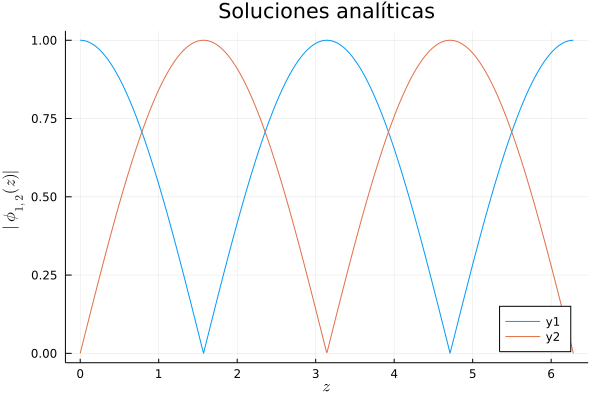

In [3]:
V = 1; # Parámetro de acoplamiento
plot(z, abs.(cos.(V*z))); plot!(z, abs.(im*cos.(V*z .+ pi/2)), 
    legend = :bottomright, xlabel = L"z", ylabel = L"|\phi_{1,2}(z)|", 
    title = "Soluciones analíticas" )

## Solución numérica

In [7]:
function dnls_derivs(du, u, p, t) # agregar parámetros
    H = p; du[:] = H*u
end

dnls_derivs (generic function with 1 method)

In [8]:
function evolution(H, ci, zmax, h, at, u0)     # eps -> Disorder width
    zspan = (0.0, zmax); p = H; prob = ODEProblem(dnls_derivs, u0, zspan, p);
    sol = solve(prob, RK4(), adaptive = false, dt = h, saveat = at);
    return sol
end

evolution (generic function with 1 method)

In [9]:
V = 1.0; # Valor de acoplamientos
γ = 0.0; # Parámetro no lineal
ci = 1.0; # Amplitud condición inicial 
tmax = 2pi; # Tiempo máximo
h = 0.01; # Paso de integración
at = h; # Paso para guardar la solución
Vcoup = im*[0.0 1.0; 1.0 0.0]; 
u0 = zeros(ComplexF64, 2); u0[1] = ci;
H = Vcoup;
sol1 = evolution(H, ci, tmax, h, at, u0);

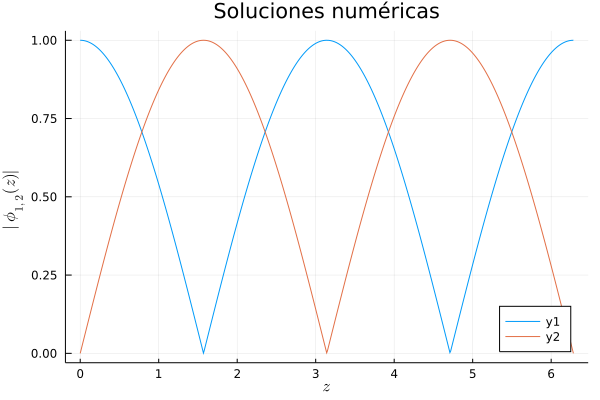

In [10]:
plot(sol1.t, (abs.(Array(sol1)))', legend = :bottomright, 
    xlabel = L"z", ylabel = L"|\phi_{1,2}(z)|", title = "Soluciones numéricas")

## Difracción discreta

\begin{equation}
i\frac{d\phi_n}{dz} + V\left( \phi_{n+1} + \phi_{n-1} \right )  = 0
\end{equation}

Consideremos ahora el caso de tres guías de onda (trímero):

\begin{equation}
i\frac{d}{dz}\begin{bmatrix} \phi_1 \\ \phi_2 \\ \phi_3 \end{bmatrix} + \hat{V} \begin{bmatrix} \phi_1 \\ \phi_2 \\ \phi_3 \end{bmatrix} = 0,
\end{equation}

donde $\hat{V}$

\begin{equation}
\hat{V} = \begin{bmatrix} 0 & V & 0\\ V & 0 & V \\ 0 & V & 0 \end{bmatrix}.
\end{equation}

In [11]:
V = 1.0; # Valor de acoplamientos
γ = 0.0; # Parámetro no lineal
ci = 1.0; # Amplitud condición inicial 
tmax = 2pi; # Tiempo máximo
h = 0.01; # Paso de integración
at = h; # Paso para guardar la solución
Vcoup = im*[0.0 V 0.0; V 0.0 V; 0.0 V 0.0]; 
u0 = zeros(ComplexF64, 3); u0[1] = ci;
H = Vcoup;
sol1 = evolution(H, ci, tmax, h, at, u0);

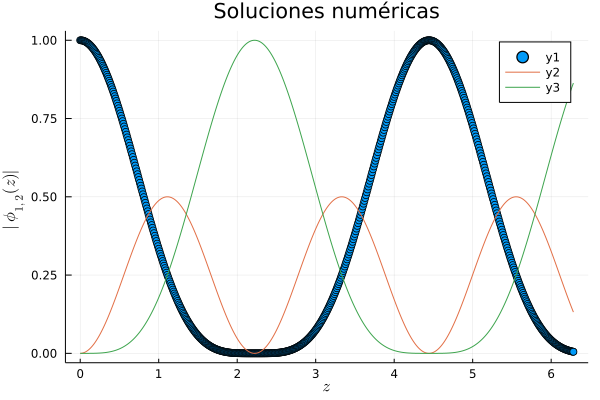

In [12]:
plot(sol1.t, abs.(Array(sol1)[1, :]).^2, seriestype = :scatter);
plot!(sol1.t, abs.(Array(sol1)[2, :]).^2);
plot!(sol1.t, abs.(Array(sol1)[3, :]).^2, 
    xlabel = L"z", ylabel = L"|\phi_{1,2}(z)|", title = "Soluciones numéricas")

In [47]:
r1 = [0, 0]

2-element Vector{Int64}:
 0
 0

In [48]:
r2 = [1, 0]

2-element Vector{Int64}:
 1
 0

In [49]:
r3 = [0, 1]

2-element Vector{Int64}:
 0
 1

In [50]:
norm(r2-r3)

1.4142135623730951

In [52]:
R = zeros(4, 2);
R[1, :] = r1;
R[2, :] = r2;
R[3, :] = r3;
R[4, :] = r1;

In [53]:
R

4×2 Matrix{Float64}:
 0.0  0.0
 1.0  0.0
 0.0  1.0
 0.0  0.0

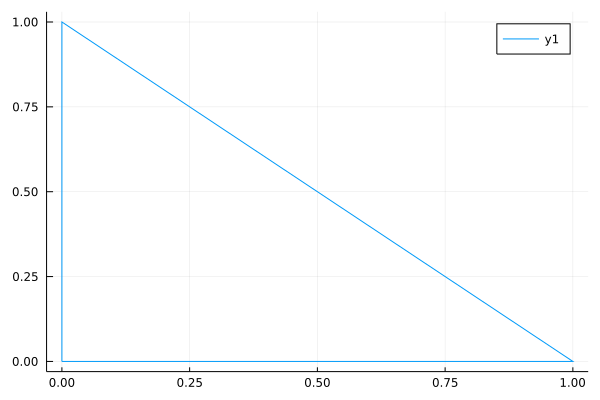

In [64]:
plot(R[:,1], R[:, 2])

In [56]:
norm(R[2, :]-R[3, :])

1.4142135623730951

In [61]:
for i = 1:3
    for j = 1:3
        if i == j
            println("no aplica")
        else
            println(norm(R[i, :] - R[j, :]))
        end
    end
end

no aplica
1.0
1.0
1.0
no aplica
1.4142135623730951
1.0
1.4142135623730951
no aplica


In [86]:
e1 = [1.0, 0.0]; e2 = [0.0, 1.0];

In [80]:
R = zeros(20, 2)
for i = 1:20
    R[i, :] = i .* e1
end

In [81]:
R

20×2 Matrix{Float64}:
  1.0  0.0
  2.0  0.0
  3.0  0.0
  4.0  0.0
  5.0  0.0
  6.0  0.0
  7.0  0.0
  8.0  0.0
  9.0  0.0
 10.0  0.0
 11.0  0.0
 12.0  0.0
 13.0  0.0
 14.0  0.0
 15.0  0.0
 16.0  0.0
 17.0  0.0
 18.0  0.0
 19.0  0.0
 20.0  0.0

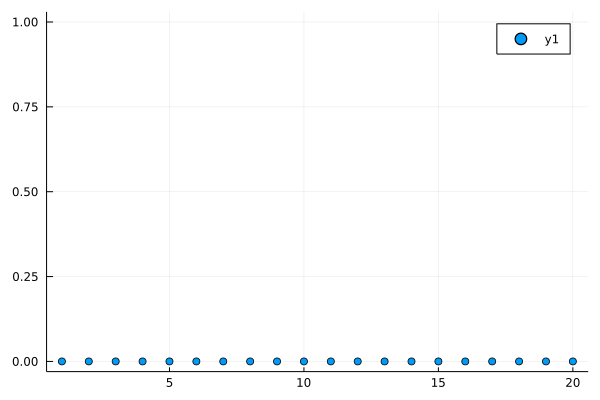

In [82]:
scatter(R[:, 1], R[:, 2])

In [84]:
V = zeros(20, 20)
for i = 1:20
    for j = 1:20
        if norm(R[i, :] - R[j, :]) == 1
            V[i, j] = 1
        else
            V[i, j] = 0
        end
    end
end

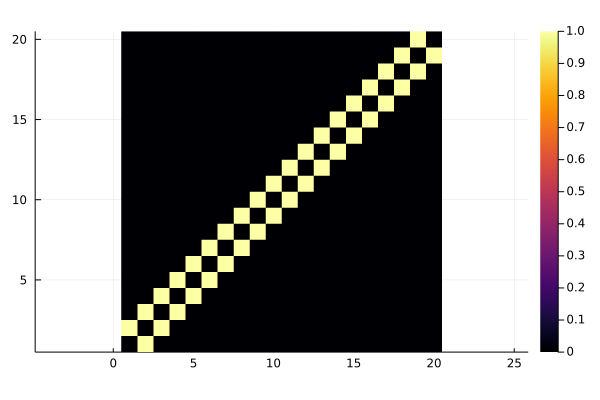

In [88]:
heatmap(V, ratio = 1)

In [ ]:
plot(X, Y, 'o')

In [89]:
BLAS.vendor()

:openblas64